# Stock Portfolio Optimiztion using Markwitz Efficient Frontier method

In this notebook, we will try to optimize a multistock portfolio by Efficient Frontier Method using Python.

In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import style

print("Libraries imported")

Libraries imported


Using Quandl API, historical stock data will be imported.

In [2]:
quandl.ApiConfig.api_key = 'Yxu-RF4ZvVHSv5HSkwc3'

In [3]:
#Stocks we want to invest in
selected_stock = ['CNP', 'F', 'WMT', 'GE', 'TSLA',
            'MSFT', 'T', 'CHK', 'AAPL', 'GOOG']

In [39]:
#importing historical data using Quandl API
hist_data = quandl.get_table('WIKI/PRICES', ticker=selected_stock,
                        qopts={'columns': ['date', 'ticker', 'adj_close']},
                        date={'gte': '2014-1-1', 'lte': '2018-12-31'}, paginate=True)

clean = hist_data.set_index('date')
table = clean.pivot(columns='ticker')


In [41]:
table.columns = [col[1] for col in table.columns]

In [42]:
table.head()

,AAPL,CHK,CNP,F,GE,GOOG,MSFT,T,TSLA,WMT
date,,,,,,,,,,
2014-01-02,73.523423,23.219207,19.116238,12.726742,24.266002,NaN,33.532800,28.411475,150.10,71.343743
2014-01-03,71.908415,23.050817,19.107861,12.784441,24.248354,NaN,33.307202,28.289537,149.56,71.108673
2014-01-06,72.300536,22.854361,19.132992,12.842140,24.054226,NaN,32.603338,28.419604,147.00,70.710863
2014-01-07,71.783135,22.947911,19.334039,12.677286,24.080698,NaN,32.856007,28.411475,149.36,70.927850
2014-01-08,72.238063,22.545644,19.132992,12.809169,24.010106,NaN,32.269454,28.208246,151.28,70.367299


Let's calculate daily and annual return and covariance

In [44]:
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 252

covariance_daily = returns_daily.cov()
covariance_annual = covariance_daily * 252

In [45]:
#Empty lists to be used later
port_returns = [] #portfolio return
port_volatility = [] #volatility of portfolio
stock_weights = [] #Weight of the stocks
sharpe_ratio = [] #Sharpe ratio of the portfolio

In [46]:
number_of_assets = len(selected_stock)  #number of stocks we will invest in
number_of_portfolios = 100000   #Number of simulated portfolios

Now, we'll create a loop calculate sharpe ratio, risk (volatility) and return for each portfolio which are created randomly

In [47]:
for portfolio in range(number_of_portfolios):
    weights = np.random.random(number_of_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

portfolios = {'Returns': port_returns,
              'Volatility': port_volatility, 'Sharpe Ratio': sharpe_ratio}

for counter, name in enumerate(selected_stock):
    portfolios[name + ' weight'] = [weights[counter]
                                    for weight in stock_weights]

df = pd.DataFrame(portfolios) #Saving aoll the portfolios in a dataframe

In [48]:
df.head()

,AAPL weight,CHK weight,CNP weight,F weight,GE weight,GOOG weight,MSFT weight,Returns,Sharpe Ratio,T weight,TSLA weight,Volatility,WMT weight
0,0.139652,0.014227,0.007847,0.123454,0.079093,0.123661,0.06129,0.093174,0.591047,0.140776,0.138912,0.157641,0.17109
1,0.139652,0.014227,0.007847,0.123454,0.079093,0.123661,0.06129,0.046093,0.217427,0.140776,0.138912,0.211992,0.17109
2,0.139652,0.014227,0.007847,0.123454,0.079093,0.123661,0.06129,0.061554,0.331917,0.140776,0.138912,0.185451,0.17109
3,0.139652,0.014227,0.007847,0.123454,0.079093,0.123661,0.06129,0.076553,0.439994,0.140776,0.138912,0.173986,0.17109
4,0.139652,0.014227,0.007847,0.123454,0.079093,0.123661,0.06129,0.051405,0.348365,0.140776,0.138912,0.147560,0.17109


In [49]:
column_orders = ['Returns', 'Volatility', 'Sharpe Ratio'] + \
    [stock+' weight' for stock in selected_stock]

df = df[column_orders]

In [50]:
df.head()

,Returns,Volatility,Sharpe Ratio,CNP weight,F weight,WMT weight,GE weight,TSLA weight,MSFT weight,T weight,CHK weight,AAPL weight,GOOG weight
0,0.093174,0.157641,0.591047,0.007847,0.123454,0.17109,0.079093,0.138912,0.06129,0.140776,0.014227,0.139652,0.123661
1,0.046093,0.211992,0.217427,0.007847,0.123454,0.17109,0.079093,0.138912,0.06129,0.140776,0.014227,0.139652,0.123661
2,0.061554,0.185451,0.331917,0.007847,0.123454,0.17109,0.079093,0.138912,0.06129,0.140776,0.014227,0.139652,0.123661
3,0.076553,0.173986,0.439994,0.007847,0.123454,0.17109,0.079093,0.138912,0.06129,0.140776,0.014227,0.139652,0.123661
4,0.051405,0.147560,0.348365,0.007847,0.123454,0.17109,0.079093,0.138912,0.06129,0.140776,0.014227,0.139652,0.123661


In [51]:
minimum_volatility = df['Volatility'].min()
maximum_sharpe = df['Sharpe Ratio'].max()

In [52]:
maximum_sharpe_portfolio = df.loc[df['Sharpe Ratio'] == maximum_sharpe]  #Marking the portfolio with highest sharpe ratio
minimum_variance_portfolio = df.loc[df['Volatility'] == minimum_volatility]   #Marking the portfolio with lowest volatility

Now Let's visualize all the portfolios by it's return and risk (Efficient Frontier)

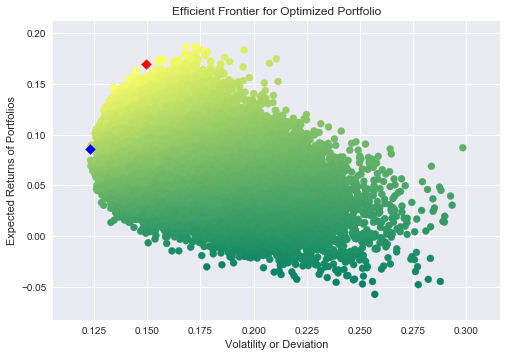

In [53]:
style.use('seaborn')
plt.scatter(x=df['Volatility'], y=df['Returns'],
            c=df['Sharpe Ratio'], cmap='summer')
plt.scatter(x=maximum_sharpe_portfolio['Volatility'],
            y=maximum_sharpe_portfolio['Returns'], c='red', marker='D', s=50)
plt.scatter(x=minimum_variance_portfolio['Volatility'],
            y=minimum_variance_portfolio['Returns'], c='blue', marker='D', s=50)
plt.xlabel('Volatility or Deviation')
plt.ylabel('Expected Returns of Portfolios')
plt.title('Efficient Frontier for Optimized Portfolio')
plt.show()

In [54]:
print('Minimum Risky Portfolio: \n', minimum_variance_portfolio.T)

print('Maximum Sharpe Ratio Portfolio: \n', maximum_sharpe_portfolio.T)

Minimum Risky Portfolio: 
                  88209
Returns       0.086344
Volatility    0.123222
Sharpe Ratio  0.700722
CNP weight    0.007847
F weight      0.123454
WMT weight    0.171090
GE weight     0.079093
TSLA weight   0.138912
MSFT weight   0.061290
T weight      0.140776
CHK weight    0.014227
AAPL weight   0.139652
GOOG weight   0.123661
Maximum Sharpe Ratio Portfolio: 
                  13323
Returns       0.169747
Volatility    0.149324
Sharpe Ratio  1.136772
CNP weight    0.007847
F weight      0.123454
WMT weight    0.171090
GE weight     0.079093
TSLA weight   0.138912
MSFT weight   0.061290
T weight      0.140776
CHK weight    0.014227
AAPL weight   0.139652
GOOG weight   0.123661


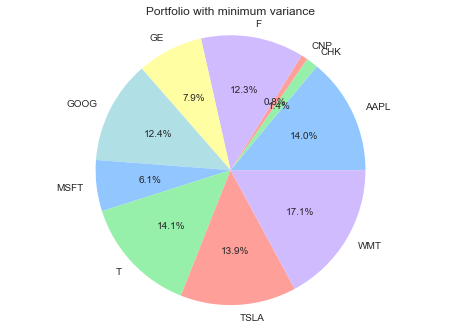

In [64]:
mvp = {}
for s in selected_stock:
    for col in minimum_variance_portfolio:
        colw = s + ' weight'
        mvp[s] = minimum_variance_portfolio[colw]

mvp = pd.DataFrame(mvp)

style.use('seaborn-pastel')
plt.pie(mvp.transpose(), labels=mvp.columns.values.tolist(), autopct='%1.1f%%')
plt.axis('equal')
plt.title('Portfolio with minimum variance')
plt.show()

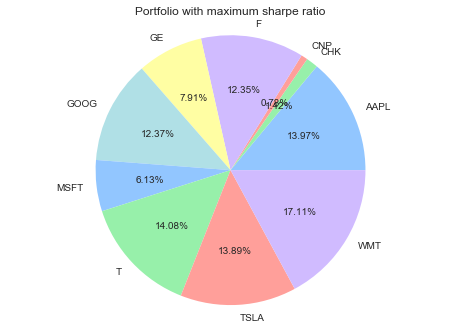

In [72]:
msp = {}
for s in selected_stock:
    for col in maximum_sharpe_portfolio:
        colw = s + ' weight'
        msp[s] = maximum_sharpe_portfolio[colw]

msp = pd.DataFrame(msp)

style.use('seaborn-pastel')
plt.pie(msp.transpose(), labels = msp.columns.values.tolist(), autopct='%1.2f%%')
plt.axis('equal')
plt.title('Portfolio with maximum sharpe ratio')
plt.show()